<a href="https://colab.research.google.com/github/jelly-decoder28/compbioworkshop/blob/main/Data_Exploration_with_Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# More about data exploration

In [ ]:
#@title
# we hid the contents of this cell because there's a lot going on in here
# you can re-hide this cell by clicking on View -> Show/hide code

!git clone https://github.com/ccbskillssem/pythonbootcamp.git
import numpy as np

### load and clean datasets ###
animals2 = np.genfromtxt('/content/pythonbootcamp/day_3/Animals2.csv',
              delimiter=',')
animals2 = animals2[:, ~np.isnan(animals2).all(axis = 0)][~np.isnan(animals2).all(axis = 1), :]
airquality = np.genfromtxt('/content/pythonbootcamp/day_3/airquality.csv',
              delimiter=',')
airquality = airquality[:, ~np.isnan(airquality).all(axis = 0)][~np.isnan(airquality).all(axis = 1), :]
nan_inds = np.where(np.isnan(airquality))
airquality[nan_inds] = np.take(np.nanmean(airquality, axis = 0), nan_inds[1])

### load in sample solution for clean_data() ###
def clean_data(data_array):
  nan_map = np.isnan(data_array)

  data_array = data_array[:, ~nan_map.all(axis = 0)]
  data_array = data_array[~nan_map.all(axis = 1), :]
  return data_array

Cloning into 'pythonbootcamp'...
remote: Enumerating objects: 298, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (163/163), done.
remote: Total 298 (delta 113), reused 82 (delta 37), pack-reused 98 (from 1)
Receiving objects: 100% (298/298), 95.57 MiB | 8.01 MiB/s, done.
Resolving deltas: 100% (141/141), done.
Updating files: 100% (50/50), done.


In [ ]:
print(animals2.shape)
print(animals2.size)
print(animals2.ndim)

(65, 2)
130
2


In [ ]:
# let's slice the first ten rows of animals2
animals2[:10, :]


array([[1.350e+00, 8.100e+00],
       [4.650e+02, 4.230e+02],
       [3.633e+01, 1.195e+02],
       [2.766e+01, 1.150e+02],
       [1.040e+00, 5.500e+00],
       [1.170e+04, 5.000e+01],
       [2.547e+03, 4.603e+03],
       [1.871e+02, 4.190e+02],
       [5.210e+02, 6.550e+02],
       [1.000e+01, 1.150e+02]])

In [ ]:
# try it out:
# slice the *last* 10 rows of animals2
animals2[-9:,:]

array([[4.288e+00, 3.920e+01],
       [7.500e-02, 1.200e+00],
       [4.800e-02, 3.300e-01],
       [3.000e+00, 2.500e+01],
       [1.600e+02, 1.690e+02],
       [9.000e-01, 2.600e+00],
       [1.620e+00, 1.140e+01],
       [1.040e-01, 2.500e+00],
       [4.235e+00, 5.040e+01]])

In [ ]:
# try it out:
# calculate the column-wise means of animals2
animals2.mean(axis=0)

array([1852.69198462,  274.28953846])

In [ ]:
a = np.array([1,2,1])
np.unique(a)

array([1, 2])

In [ ]:
# using np.histogram() to generate bin count and intervals for
# temperature values in airquality

np.histogram(airquality[:, 3])

(array([ 8,  8, 13, 10, 22, 24, 29, 20, 12,  7]),
 array([56. , 60.1, 64.2, 68.3, 72.4, 76.5, 80.6, 84.7, 88.8, 92.9, 97. ]))

In [ ]:
# creating bins from the minimum temp to the maximum temp in 5 degree intervals

min_temp = airquality[:, 3].min()
max_temp = airquality[:, 3].max()

temp_bins = np.arange(min_temp, max_temp + 5, 5)


In [ ]:
# specifying temp_bins in np.histogram()

np.histogram(airquality[:, 3], bins=temp_bins)

(array([ 8, 10, 15, 19, 33, 34, 20, 12,  2]),
 array([ 56.,  61.,  66.,  71.,  76.,  81.,  86.,  91.,  96., 101.]))

In [ ]:
import matplotlib.pyplot as plt # the alias is plt

(array([ 8.,  8., 13., 10., 22., 24., 29., 20., 12.,  7.]),
 array([56. , 60.1, 64.2, 68.3, 72.4, 76.5, 80.6, 84.7, 88.8, 92.9, 97. ]),
 <BarContainer object of 10 artists>)

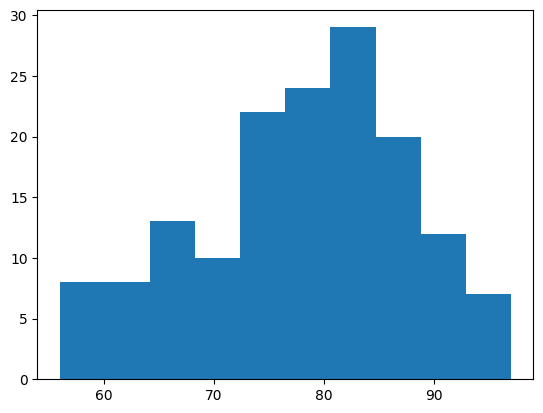

In [ ]:
# creating a histogram of temperatures
plt.hist(airquality[:, 3])

(array([ 8., 10., 15., 19., 33., 34., 20., 12.,  2.]),
 array([ 56.,  61.,  66.,  71.,  76.,  81.,  86.,  91.,  96., 101.]),
 <BarContainer object of 9 artists>)

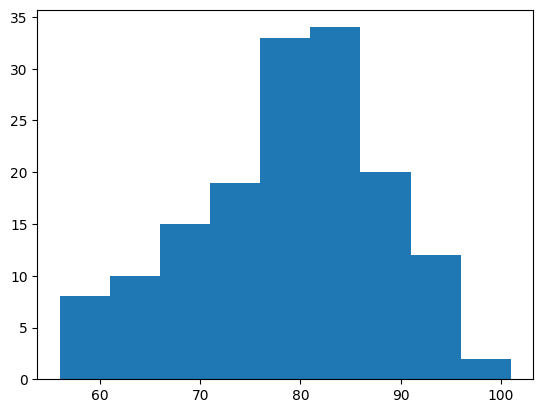

In [ ]:
# creating a histogram of temperatures using temp_bins
plt.hist(airquality[:, 3], bins=temp_bins)

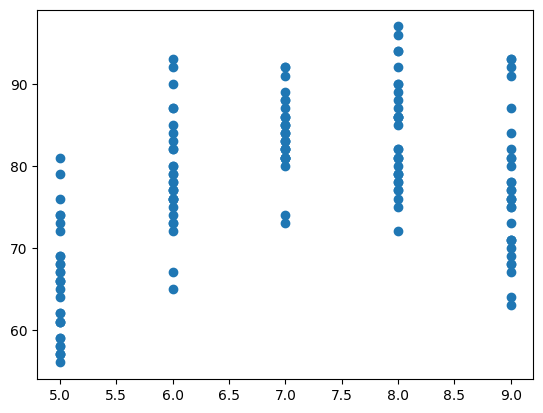

In [ ]:
# visualizing temperature ranges by month

plt.scatter(airquality[:, 4], airquality[:, 3])

{'bodies': [<matplotlib.collections.FillBetweenPolyCollection at 0x7ccce204cd90>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7ccce1acf0d0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7ccce211f410>,
 'cbars': <matplotlib.collections.LineCollection at 0x7ccce1accf10>}

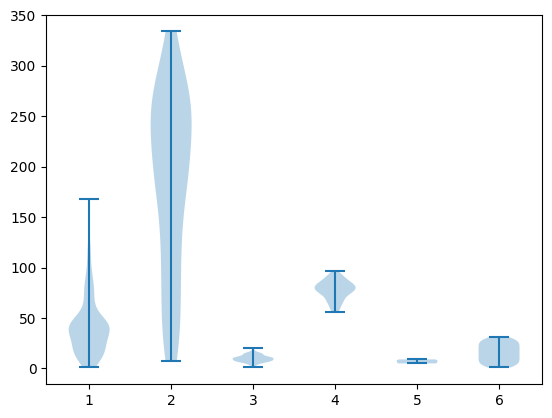

In [ ]:
# visualize the distribution of values in all the columns.
plt.violinplot(airquality)


As you can see, these plots are quite rudimentary, but they get the job done for data exploration. We'll explore greater `pyplot` functionality on Friday.

# Introduction to Pandas




In [ ]:
# try it out: import pandas with its alias
import pandas as pd

In [ ]:
# importing data
airquality_df = pd.read_csv('/content/pythonbootcamp/day_3/airquality.csv').drop('Unnamed: 0', axis = "columns")
airquality_df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [ ]:
hepatocellular_df = pd.read_csv('/content/pythonbootcamp/day_3/hepatoCellular.csv').drop('Unnamed: 0', axis = 1)
hepatocellular_df

In [ ]:
# before, if we wanted CXCL17T expression
hepatocellular[:,19]

In [ ]:
# if we want to examine CXCL17T expression in our DataFrame
hepatocellular_df['CXCL17T']

In [ ]:
# let's sample 5 random rows from airquality

rng = np.random.default_rng(2023) # this time, using a seed value for reproducibility
random_airquality = rng.choice(airquality, 5)
random_airquality

In [ ]:
# now let's save random_airquality as a comma-separated value file
np.savetxt('random_airquality.csv', random_airquality, delimiter = ',')